![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Teste 7: Erros do polinômio interpolador

## Questão 1: os métodos

Escreva uma função que retorna os coeficientes do polinômio interpolador,
dadas duas listas (ou `np.array`s) para $x_i$ e $y_i$.

Use esta função para criar uma outra, que retorna uma função
"naturalmente" vetorizada (ou seja, sem usar `np.vectorize`)
que calcula esse polinômio interpolador.

In [73]:
def lagrange_coefs(xs,ys):
    """ 
    Coeficientes (em ordem crescente) do polinômio interpolador dos pontos (x_i, y_i).
    """
    assert(len(xs) == len(ys))
    vander = np.vander(xs)
    coefs = np.linalg.solve(vander,ys)
    return np.flip(coefs)
            
def lagrange(xs,ys):
    """ 
    Retorna uma função que calcula polinômio interpolador de Lagrange dos pontos (x_i, y_i). 
    """
    coefs = lagrange_coefs(xs,ys)
    #funcao que cria (x-x1),(x-x2), ..., (x-x{len(xs)})
    return np.poly1d(coefs[::-1])

In [74]:
c = lagrange_coefs([1,2,3], [4,5,7])
assert np.allclose(c, [4, -1/2, 1/2], atol=1e-14, rtol=1e-14)

In [75]:
c = lagrange_coefs([1,2,3], [4,5,7])
c

array([ 4. , -0.5,  0.5])

In [77]:
p = lagrange([1,2,3], [4,5,7])

In [78]:
%%timeit
p(3)

25.6 µs ± 961 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [79]:
p = lagrange([1,2,3], [4,5,7])
assert np.isclose(p(0), 4, atol=1e-14, rtol=1e-14)
assert np.isclose(p(1/2), 3.875, atol=1e-14, rtol=1e-14)

In [80]:
c = lagrange_coefs([1,-1,2,-2], [1, 2, 3, 4])
assert np.allclose(c*12, [10, -7, 8, 1])

In [81]:
p = lagrange([1,-1,2,-2], [1, 2, 3, 4])
assert np.isclose(p(5.1), 26.252583333333333, atol=1e-14, rtol=1e-14)

## Questão 2: Calculando erros

Dadas duas funções, $f$ e $g$, podemos definir o erro entre elas num intervalo $[a,b]$ como
- a integral do valor absoluto da diferença
- a raiz quadrada da integral do quadrado da diferença
- o máximo do valor absoluto da diferença

No computador, vamos aproximar estas medidas, calculando a diferença em alguma discretização do intervalo,
e depois tomando o máximo / soma dos erros.
Vamos usar o "método do ponto médio" para as integrais e, por analogia,
os mesmos pontos para o máximo.

In [121]:
def midpoint(f, a, b, n=1000,should_plot=False):
    xs,h = np.linspace(a,b,num=n,endpoint=False,retstep=True)
    xs = xs + h/2
    if(should_plot):
        ax = plt.subplot(111)
        ax.plot(xs,f(xs),label=f.__name__)
        ax.bar(xs[0], f(xs[0]), width=h, color='b', align='center',label="midpoint_approx")
        for x in xs[1:]:
            ax.bar(x, f(x), width=h, color='b', align='center')
        plt.legend()
        plt.title(f"Integral de {f.__name__} no intervalo [{a:.4f} , {b:.4f}]")
    return np.sum(f(xs))*h

In [122]:
def erro1(f, g, a, b, n=100):
    def dif(x):
        return np.abs(np.add(f(x),-1*g(x)))
    return midpoint(dif,a,b,n)

In [123]:
assert np.isclose(erro1(np.sin, np.cos, 0, np.pi, n=250), 2.8283899040391645)

In [124]:
assert np.isclose(erro1(np.exp, np.cos, -np.pi, np.pi), 23.565960230071205)

In [125]:
def erro2(f, g, a, b, n=100):
    def sqr_dif(x):
        return np.power(np.add(f(x),-1*g(x)),2)
    return np.sqrt(midpoint(sqr_dif,a,b,n))

In [126]:
assert np.isclose(erro2(np.sin, np.cos, 0, np.pi), np.sqrt(np.pi))
assert np.isclose(erro2(np.exp, np.cos, -np.pi, np.pi, n=200), 17.14462097595834)

In [135]:
def erromax(f, g, a, b, n=100):
    xs,h = np.linspace(a,b,num=n,endpoint=True,retstep=True)
    xs = xs + h/2
    def dif(x):
        return np.abs(np.add(f(x),-1*g(x)))
    l = [np.abs(f(x) - g(x)) for x in xs]
    return max(l)

In [136]:
erromax(np.exp, np.cos, -np.pi, np.pi, n=200)

24.508786638288363

In [137]:
erromax(np.sin, np.cos,0, np.pi/2)

1.0079017629882427

In [134]:
assert np.isclose(erromax(np.sin, np.cos, 0, np.pi/2), 0.9921152567560784)
assert np.isclose(erromax(np.exp, np.cos, -np.pi, np.pi, n=200), 23.779916094373814)

AssertionError: 

## Questão 3: Gráficos

Faça o gráfico da função $\sin(x^2)$, e também do polinômio interpolador de grau 3,
no intervalo $[0, \sqrt{2\pi}]$.

Text(0.5, 1.0, 'Sin($x^2$) e seu polinomio aproximador')

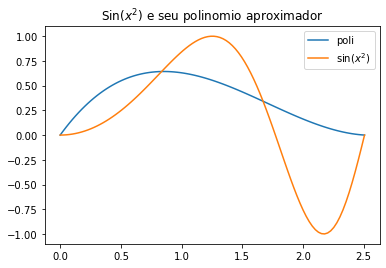

In [92]:
xs = np.linspace(0,np.sqrt(2*np.pi),num=100)
def f(x): return np.sin(x*x)
sub_3 = np.linspace(0,np.sqrt(2*np.pi),num=4)
p = lagrange(sub_3,f(sub_3))
plt.plot(xs,p(xs),label="poli")
plt.plot(xs,f(xs),label="sin($x^2$)")
plt.legend()
plt.title("Sin($x^2$) e seu polinomio aproximador")

Agora, faça o gráfico da diferença (sem valor absoluto) entre a função e o polinômio interpolador

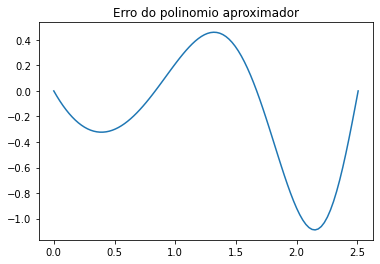

In [93]:
def dif(x,f,g):
        return np.add(f(x),-1*g(x))
error = dif(xs,f,p)
plt.plot(xs,error)
plt.title("Erro do polinomio aproximador")
ax = plt.gca()

In [94]:
assert len(ax.lines) == 1
assert ax.get_title != ""

ys = ax.lines[0].get_ydata()
assert min(ys) < -1
assert max(ys) > 0.4

Repita para o polinômio de grau 7 (que tem o dobro de coeficientes).

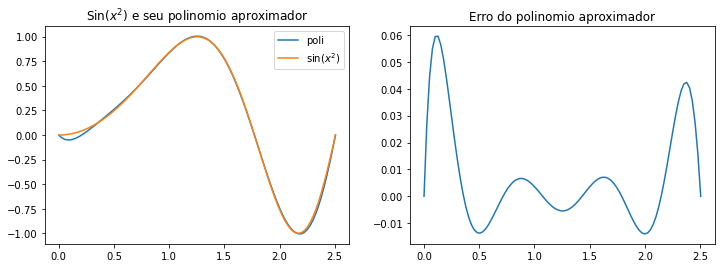

In [96]:
fig, axs = plt.subplots(ncols=2, figsize=(12,4))
ax1, ax2 = axs
sub_7 = np.linspace(0,np.sqrt(2*np.pi),num=8)
p = lagrange(sub_7,f(sub_7))
ax1.plot(xs,p(xs),label="poli")
ax1.plot(xs,f(xs),label="sin($x^2$)")
ax1.legend()
ax1.set_title("Sin($x^2$) e seu polinomio aproximador")
error = dif(xs,f,p)
ax2.plot(xs,error)
ax2.set_title("Erro do polinomio aproximador")
ax = plt.gca()

In [97]:
assert len(ax1.lines) == 2
assert len(ax1.legend().texts) == 2
assert ax1.title.get_text() != ""

In [98]:
ys = ax2.lines[0].get_ydata()
max(ys)

0.05955031654640026

In [99]:
assert len(ax2.lines) == 1
assert ax2.title.get_text() != ""

ys = ax2.lines[0].get_ydata()
assert np.isclose(max(ys), 0.06, atol=1e-4)
assert np.isclose(min(ys), -0.0140140, atol=1e-4)

AssertionError: 

O erro máximo é fácil de ver pelo gráfico.
Use as funções `erro1` e `erro2` para comparar, também, os erros "ao longo do intervalo inteiro".

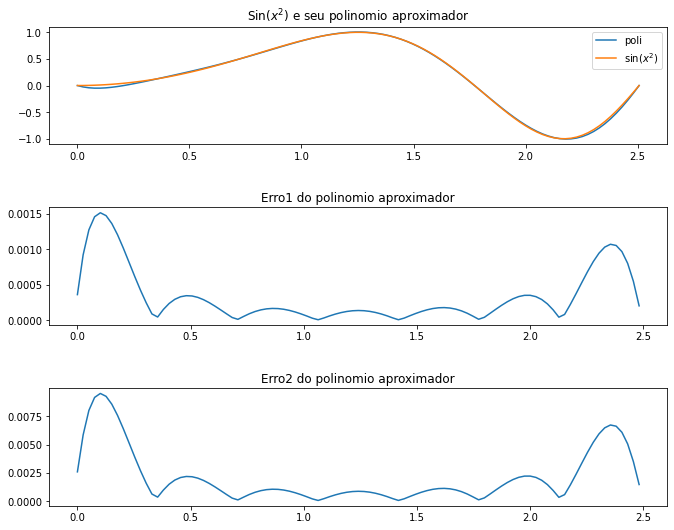

In [101]:
fig, axs = plt.subplots(nrows=3, figsize=(12,4))
fig.set_size_inches(10,8)
ax1, ax2, ax3 = axs
sub_7 = np.linspace(0,np.sqrt(2*np.pi),num=8)
p = lagrange(sub_7,f(sub_7))
ax1.plot(xs,p(xs),label="poli")
ax1.plot(xs,f(xs),label="sin($x^2$)")
ax1.legend()
ax1.set_title("Sin($x^2$) e seu polinomio aproximador")
error = [erro1(f,p,xs[i-1],xs[i]) for i in range(1,len(xs))]
ax2.plot(xs[:-1],error)
ax2.set_title("Erro1 do polinomio aproximador")
error = [erro2(f,p,xs[i-1],xs[i]) for i in range(1,len(xs))]
ax3.plot(xs[:-1],error)
ax3.set_title("Erro2 do polinomio aproximador")
fig.tight_layout(pad=3.0)
ax = plt.gca()

## Questão 4: Erros e subdivisões

Para o grau $d$ do polinômio interpolador variando entre $3$ e $30$,
faça o gráfico do máximo do erro entre o polinômio interpolador e a função $\sin(x^2)$,
no mesmo intervalo $[0, \sqrt{2\pi}]$.

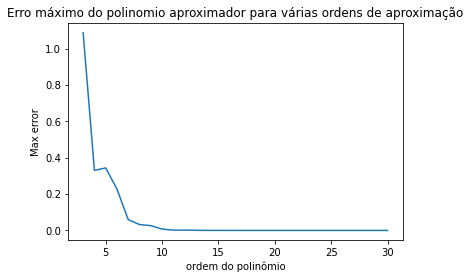

In [103]:
ds = np.arange(3,30+1)
max_errs = []

for d in ds:
    sub_n = np.linspace(0,np.sqrt(2*np.pi),num=d+1)
    p = lagrange(sub_n,f(sub_n))
    max_errs.append(erromax(f,p,0,np.sqrt(2*np.pi)))

plt.plot(ds,max_errs)
plt.title("Erro máximo do polinomio aproximador para várias ordens de aproximação")
plt.xlabel("ordem do polinômio")
plt.ylabel("Max error")
ax = plt.gca()

In [104]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

Como o erro decai quando aumentamos $n$?

O erro decai de forma quase exponencial e parece convergir para 0. 

Agora, repita para os 3 erros.

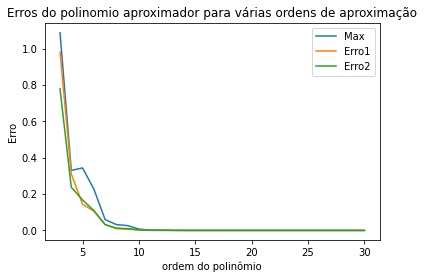

In [106]:
ds = np.arange(3,30+1)
errs_max = []
errs_1   = []
errs_2   = []

for d in ds:
    sub_n = np.linspace(0,np.sqrt(2*np.pi),num=d+1)
    p = lagrange(sub_n,f(sub_n))
    errs_max.append(erromax(f,p,0,np.sqrt(2*np.pi)))
    errs_1.append(erro1(f,p,0,np.sqrt(2*np.pi)))
    errs_2.append(erro2(f,p,0,np.sqrt(2*np.pi)))
    
plt.plot(ds,errs_max,label="Max")
plt.plot(ds,errs_1,label="Erro1")
plt.plot(ds,errs_2,label="Erro2")
plt.legend()
plt.title("Erros do polinomio aproximador para várias ordens de aproximação")
plt.xlabel("ordem do polinômio")
plt.ylabel("Erro")

ax = plt.gca()

In [107]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3
assert ax.get_title() != ""

O que você observa?  Todos os erros decaem da mesma forma?

Sim, todos os decaimentos se aproximam de uma exponencial. O erro máximo, contudo, aparenta ter um comportamento um pouco diferente entre os polinomios de grau 5 e grau 10, mas depois converge para 0 tal como os demais. 